### **Data Loading and Initial Inspection**

This section loads the data from the 'selectedfeaturesdata.csv' file into a pandas DataFrame and displays the first few rows to get an initial look at the data structure and content.

In [127]:
import numpy as np
import pandas as pd

### **Displaying the First Few Rows**


This cell displays the head of the DataFrame after the initial loading to confirm the data is loaded correctly.

In [128]:
df = pd.read_csv('selectedfeaturesdata.csv')
df.head()

,Gender,Age,numbness,wobbliness,afraidofworsthappening,heartpounding,unsteadyorunstable,terrified,handstrembling,shakystate,difficultyinbreathing,scared,hotorcoldsweats,faceflushed,TotalAnxietyScore,AnxietyLevel,CourseRecommended
0,Male,19,1,1,3,2,1,1,1,1,0,1,2,0,28,Moderate Anxiety,C2
1,Female,19,2,2,3,3,2,2,3,2,2,2,3,3,49,Severe Anxiety,C3
2,Female,19,0,2,2,1,1,1,1,1,1,0,2,0,22,Moderate Anxiety,C2
3,Female,21,1,2,0,3,3,0,0,0,0,0,1,3,27,Moderate Anxiety,C2
4,Female,21,2,3,2,3,3,3,2,2,3,3,3,1,52,Severe Anxiety,C3


### **Dropping Unnecessary Columns**

Here, we remove the 'TotalAnxietyScore' and 'CourseRecommended' columns from the DataFrame as they are not needed for the anxiety level classification task.

In [129]:
df = df.drop(['TotalAnxietyScore','CourseRecommended'], axis=1)

### **Displaying DataFrame Head After Dropping Columns**

This cell displays the head of the DataFrame again to show the result after dropping the specified columns.

In [130]:
df.head()

,Gender,Age,numbness,wobbliness,afraidofworsthappening,heartpounding,unsteadyorunstable,terrified,handstrembling,shakystate,difficultyinbreathing,scared,hotorcoldsweats,faceflushed,AnxietyLevel
0,Male,19,1,1,3,2,1,1,1,1,0,1,2,0,Moderate Anxiety
1,Female,19,2,2,3,3,2,2,3,2,2,2,3,3,Severe Anxiety
2,Female,19,0,2,2,1,1,1,1,1,1,0,2,0,Moderate Anxiety
3,Female,21,1,2,0,3,3,0,0,0,0,0,1,3,Moderate Anxiety
4,Female,21,2,3,2,3,3,3,2,2,3,3,3,1,Severe Anxiety


### **Checking Unique Values**

This code checks the unique values in the 'Gender' and 'AnxietyLevel' columns to understand the distinct categories within these features.

In [131]:
print(df['Gender'].unique())
print(df[ 'AnxietyLevel'].unique())

['Male' 'Female']
['Moderate Anxiety' 'Severe Anxiety' 'Low Anxiety']


### **Encoding Categorical Features**

We encode the 'Gender' column using a dictionary mapping 'Male' to 0 and 'Female' to 1. The original 'Gender' column is then updated with these numerical values.

In [132]:
#encoding

gender = {
    "Male": 0,
    "Female": 1
}
df["Gender"]= df["Gender"].map(gender)

### **Encoding Anxiety Level**

This dictionary maps the categorical 'AnxietyLevel' to numerical values: 'Moderate Anxiety' to 0, 'Severe Anxiety' to 1, and 'Low Anxiety' to 2. The 'AnxietyLevel' column in the DataFrame is updated with these encoded values.

In [133]:
anxiety_level = {

                 "Moderate Anxiety":0,
                 "Severe Anxiety": 1,
                 "Low Anxiety":2

}
df["AnxietyLevel"] = df["AnxietyLevel"].map(anxiety_level)

### **Displaying DataFrame Head After Encoding**

This cell displays the head of the DataFrame to show the results of the encoding process on the 'Gender' and 'AnxietyLevel' columns.

In [134]:
df.head()

,Gender,Age,numbness,wobbliness,afraidofworsthappening,heartpounding,unsteadyorunstable,terrified,handstrembling,shakystate,difficultyinbreathing,scared,hotorcoldsweats,faceflushed,AnxietyLevel
0,0,19,1,1,3,2,1,1,1,1,0,1,2,0,0
1,1,19,2,2,3,3,2,2,3,2,2,2,3,3,1
2,1,19,0,2,2,1,1,1,1,1,1,0,2,0,0
3,1,21,1,2,0,3,3,0,0,0,0,0,1,3,0
4,1,21,2,3,2,3,3,3,2,2,3,3,3,1,1


### **Calculating Correlation with Anxiety Level**

We calculate the correlation of each feature with the 'AnxietyLevel' to understand the linear relationship between the features and the target variable.

In [135]:
df.corr()['AnxietyLevel']

,AnxietyLevel
Gender,-0.138238
Age,0.061482
numbness,-0.171841
wobbliness,-0.348429
afraidofworsthappening,-0.263120
heartpounding,-0.280536
unsteadyorunstable,-0.296954
terrified,-0.272445
handstrembling,-0.324988
shakystate,-0.277779


### **Separating Features and Target Variable**

The data is split into features (`x`) and the target variable (`y`), which is 'AnxietyLevel'.

In [137]:
x = df.drop('AnxietyLevel', axis=1)
y = df['AnxietyLevel']

### **Scaling Features**

We initialize a `StandardScaler` to scale the features. Scaling is important for many machine learning algorithms, especially neural networks, as it standardizes the range of the input features.

In [138]:
#scaling all data
from sklearn.preprocessing import StandardScaler #scale bw -1 and 1
scaler = StandardScaler()

### **Applying Scaling to Features**

The `fit_transform` method of the scaler is applied to the features (`x`) to scale them. The scaler learns the mean and standard deviation from the data and then transforms the data.

In [139]:
x = scaler.fit_transform(x)

### **Checking Shape of Scaled Features**

This cell prints the shape of the scaled features array to confirm the dimensions.

In [140]:
x.shape

(1442, 14)

### **Splitting Data into Training and Testing Sets**

The data is split into training and testing sets using `train_test_split` with a test size of 20% and a `random_state` for reproducibility.

In [141]:
#splits the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **Checking Shapes of Training and Testing Sets**

This cell prints the shapes of the training and testing sets for both features and the target variable to verify the split was performed correctly.

In [142]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1153, 14)
(289, 14)
(1153,)
(289,)


### **Expanding Dimensions of Target Variable**

We expand the dimensions of the target variables (`y_train` and `y_test`) to match the expected input shape for the neural network model.

In [143]:
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

### **Checking Shapes of Expanded Target Variables**

This cell prints the shapes of the target variables after expanding the dimensions.

In [144]:
print(y_train.shape)
print(y_test.shape)

(1153, 1)
(289, 1)


### **Getting the Number of Input Features**

This cell gets the number of input features from the shape of the training data, which will be used as the input dimension for the neural network.

In [145]:
x_train.shape[1] #inputs

14

### **Importing Libraries for Model Building**

We import the necessary libraries from TensorFlow and Keras to build the neural network model, including `Sequential`, `Dense`, `Dropout`, `BatchNormalization`, and `to_categorical`.

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

### **Defining the Neural Network Model**

This code defines a sequential neural network model. It includes dense layers with ReLU activation, batch normalization for stabilizing training, and dropout layers to prevent overfitting. The final layer uses a softmax activation for multi-class classification.

In [147]:
model = models.Sequential([

    layers.Dense(64, activation='relu', input_shape=(14,)),   # input = 14 features
    layers.BatchNormalization(),                              # normalize activations
    layers.Dropout(0.3),                                      # randomly drop 30% neurons

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(3, activation='softmax')
]

)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Compiling the Model**

We compile the model by specifying the optimizer ('adam'), the loss function ('sparse_categorical_crossentropy' for multi-class classification with integer labels), and the evaluation metric ('accuracy').

In [148]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

### **Training the Model**

The model is trained using the training data (`x_train`, `y_train`) for 100 epochs with a batch size of 32. The validation data (`x_test`, `y_test`) is used to monitor performance during training, and verbose is set to 1 to display training progress.

In [149]:
history = model.fit(
    x_train,
    y_train,
    epochs = 100,
    batch_size = 32,
    validation_data = (x_test, y_test),
    verbose = 1
)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.4263 - loss: 1.5272 - val_accuracy: 0.6886 - val_loss: 0.7783
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6525 - loss: 0.9167 - val_accuracy: 0.7716 - val_loss: 0.6129
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7188 - loss: 0.6931 - val_accuracy: 0.8062 - val_loss: 0.5231
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7636 - loss: 0.5697 - val_accuracy: 0.8374 - val_loss: 0.4558
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7690 - loss: 0.5530 - val_accuracy: 0.8512 - val_loss: 0.4043
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8146 - loss: 0.4968 - val_accuracy: 0.8512 - val_loss: 0.3852
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7744 - loss: 0.5363 - val_accuracy: 0.8685 - val_loss: 0.3610
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8249 - loss: 0.4340 - val_accuracy: 0.8651 -

### **Evaluating the Model**

We evaluate the trained model on the test data (`x_test`, `y_test`) to determine its performance on unseen data. The loss and accuracy on the test set are printed.

In [150]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9204


### **Making a Sample Prediction**

This section demonstrates how to use the trained model to make a prediction on a sample input. The sample input is first scaled using the same scaler fitted on the training data. The predicted probabilities for each class and the predicted class label are then printed.

In [151]:
import numpy as np

sample_input = np.array([[1, 25, 1, 2, 3, 2, 1, 1, 1, 1, 0, 1, 2, 0]])

sample_input = scaler.transform(sample_input)

# Predict
prediction = model.predict(sample_input)

print("Prediction probabilities:", prediction)
print("Predicted class:", np.argmax(prediction, axis=1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
Prediction probabilities: [[0.98968893 0.00759914 0.00271201]]
Predicted class: [0]


### **Visualizing Training History**

This code plots the training and validation accuracy and loss over the epochs. This helps visualize the model's learning progress and identify potential overfitting.

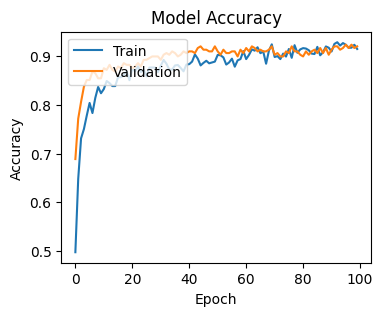

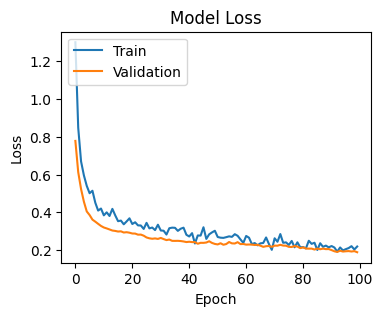

In [152]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(4, 3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Displaying Confusion Matrix**

We generate and display a confusion matrix to visualize the performance of the classification model. The confusion matrix shows the number of correct and incorrect predictions for each anxiety level class. The class labels are retrieved from the `anxiety_level` mapping for better readability.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


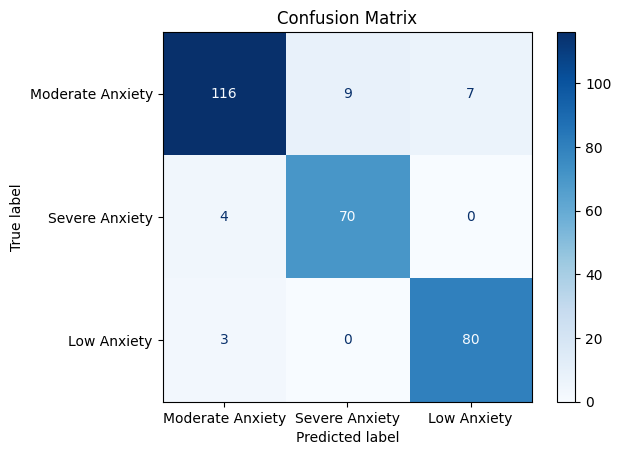

In [153]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# The true labels are in y_test
y_true = y_test.flatten() # Flatten y_test to match the shape of y_pred_classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Define class labels based on the anxiety_level mapping
class_labels = list(anxiety_level.keys())

# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()